In [38]:
from qiskit import QuantumCircuit, Aer, assemble, IBMQ, transpile
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex, plot_bloch_multivector
from qiskit.circuit import Gate
import qiskit.extensions as q_ext
from qiskit.quantum_info import Statevector
from qiskit.circuit.quantumregister import QuantumRegister
from qiskit.exceptions import QiskitError

from qiskit import QuantumCircuit, QuantumRegister,\
    ClassicalRegister,transpile, Aer, IBMQ,execute
from qiskit.test.mock import FakeBoeblingen
backend = FakeBoeblingen()


import matplotlib.pyplot as plt
import numpy as np
from math import pi


## Graph-Färbe-Probleme

Bei einem Graph-F#rbe-Problem wird die Frage gestellt, **wie man die Knoten eines Graphs so ”einfärben“ kann, dass keine zwei benachbarten Knoten dieselbe Farbe haben.**

**”Benachbart“** heißt, dass die Knoten durch eine **Kante verbunden** sind.


Bei den folgenden Graphen **G = (V, E)** sind manche Knoten **schon gefärbt**. Verwenden Sie **Grovers Algorithmus**, um eine **gultige Färbung fur die restlichen Knoten zu finden.** Sie müssen sich dabei uberlegen, wie Sie die Knoten und Kanten darstellen und wie Sie die Farben codieren.


### Aufgabe 1.7: 4 Knoten, 4 Farben
**V = {0, 1, 2, 3}\
E = {(0, 1),(0, 2),(0, 3),(1, 2),(1, 3),(2, 3)}\
F = {(0, B),(1, Y ),(2, R)}**

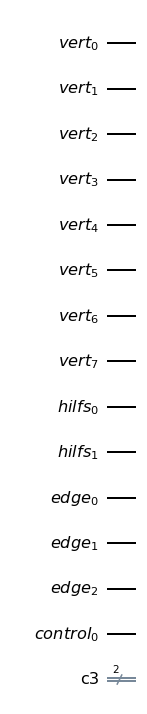

In [39]:
vert = QuantumRegister(8, name ='vert')
hilfs = QuantumRegister(2, name ='hilfs')
edg = QuantumRegister(3, name ='edge')
contr = QuantumRegister(1, name ='control')
cr = ClassicalRegister(2)

qc = QuantumCircuit(vert, hilfs, edg, contr, cr)
qc.draw('mpl')
#color coding: 00-> Y, 01-> B, 10-> G, 11-> R
#F = {(0, B),(1, Y ),(2, R)}

qc.x(vert[1])
qc.x(vert[4])
qc.x(vert[5])
qc.h(vert[6])
qc.h(vert[7])

qc.draw('mpl')

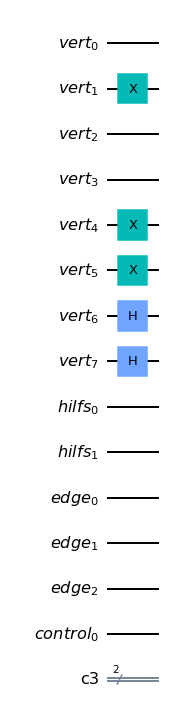

In [40]:
#color coding: 00-> Y, 01-> B, 10-> G, 11-> R
#F = {(0, B),(1, Y ),(2, R)}

qc.x(vert[1])
qc.x(vert[4])
qc.x(vert[5])
qc.h(vert[6])
qc.h(vert[7])

qc.draw('mpl')

In [41]:
#set control qubit in state |->
qc.x(contr)
qc.h(contr)

In [54]:
def right(qc):
    #apply U_f
    #encode edges
    #0-3
    qc.x(edg[0])
    qc.ccx(vert[0], vert[6], hilfs[0])
    qc.ccx(vert[1], vert[7], hilfs[1])
    qc.ccx(hilfs[0], hilfs[1], edg[0])
    qc.reset(hilfs[0])
    qc.reset(hilfs[1])

    #1-3
    qc.x(edg[1])
    qc.ccx(vert[2], vert[6], hilfs[0])
    qc.ccx(vert[3], vert[7], hilfs[1])
    qc.ccx(hilfs[0], hilfs[1], edg[1])
    qc.reset(hilfs[0])
    qc.reset(hilfs[1])

    #2-3
    qc.x(edg[2])
    qc.ccx(vert[4], vert[6], hilfs[0])
    qc.ccx(vert[5], vert[7], hilfs[1])
    qc.ccx(hilfs[0], hilfs[1], edg[2])
    qc.reset(hilfs[0])
    qc.reset(hilfs[1])
    qc.draw('mpl')
    #add negative amplitude to the state with all ones (all edges connecting nodes with different colours)
    qc.barrier()
    qc.mcx(edg,contr)
    qc.barrier()
    qc.draw('mpl')
    return qc

In [55]:

#reverse edge encoding
#apply U_f
#encode edges


def reverce(qc):
    #2-3
    qc.ccx(hilfs[0], hilfs[1], edg[2])
    qc.ccx(vert[5], vert[7], hilfs[1])
    qc.ccx(vert[4], vert[6], hilfs[0])
    qc.x(edg[2])


    #1-3
    qc.reset(hilfs[1])
    qc.reset(hilfs[0])
    qc.ccx(hilfs[0], hilfs[1], edg[1])
    qc.ccx(vert[3], vert[7], hilfs[1])
    qc.ccx(vert[2], vert[6], hilfs[0])
    qc.x(edg[1])

    #0-3
    qc.reset(hilfs[1])
    qc.reset(hilfs[0])
    qc.ccx(hilfs[0], hilfs[1], edg[0])
    qc.ccx(vert[1], vert[7], hilfs[1])
    qc.ccx(vert[0], vert[6], hilfs[0])
    qc.x(edg[0])
    qc.draw('mpl')
    return qc

In [48]:
def reflection(qc,x):
    '''Performs reflection around state |0>: adds a negative phase only to state |0>'''
    qc.x(x) #apply X to whole register
    qc.h(x[-1]) #apply hadamard to last qubit
    qc.mcx(x[:-1],x[-1]) #apply multi control x gate
    qc.h(x[-1])
    qc.x(x)
    
def diffuser(qc,x):
    '''Transforms superposition state |s> -> |0>, reflects about |0>
    and transforms back to |s> again.'''
    qc.h(x)
    reflection(qc,x)
    qc.h(x)

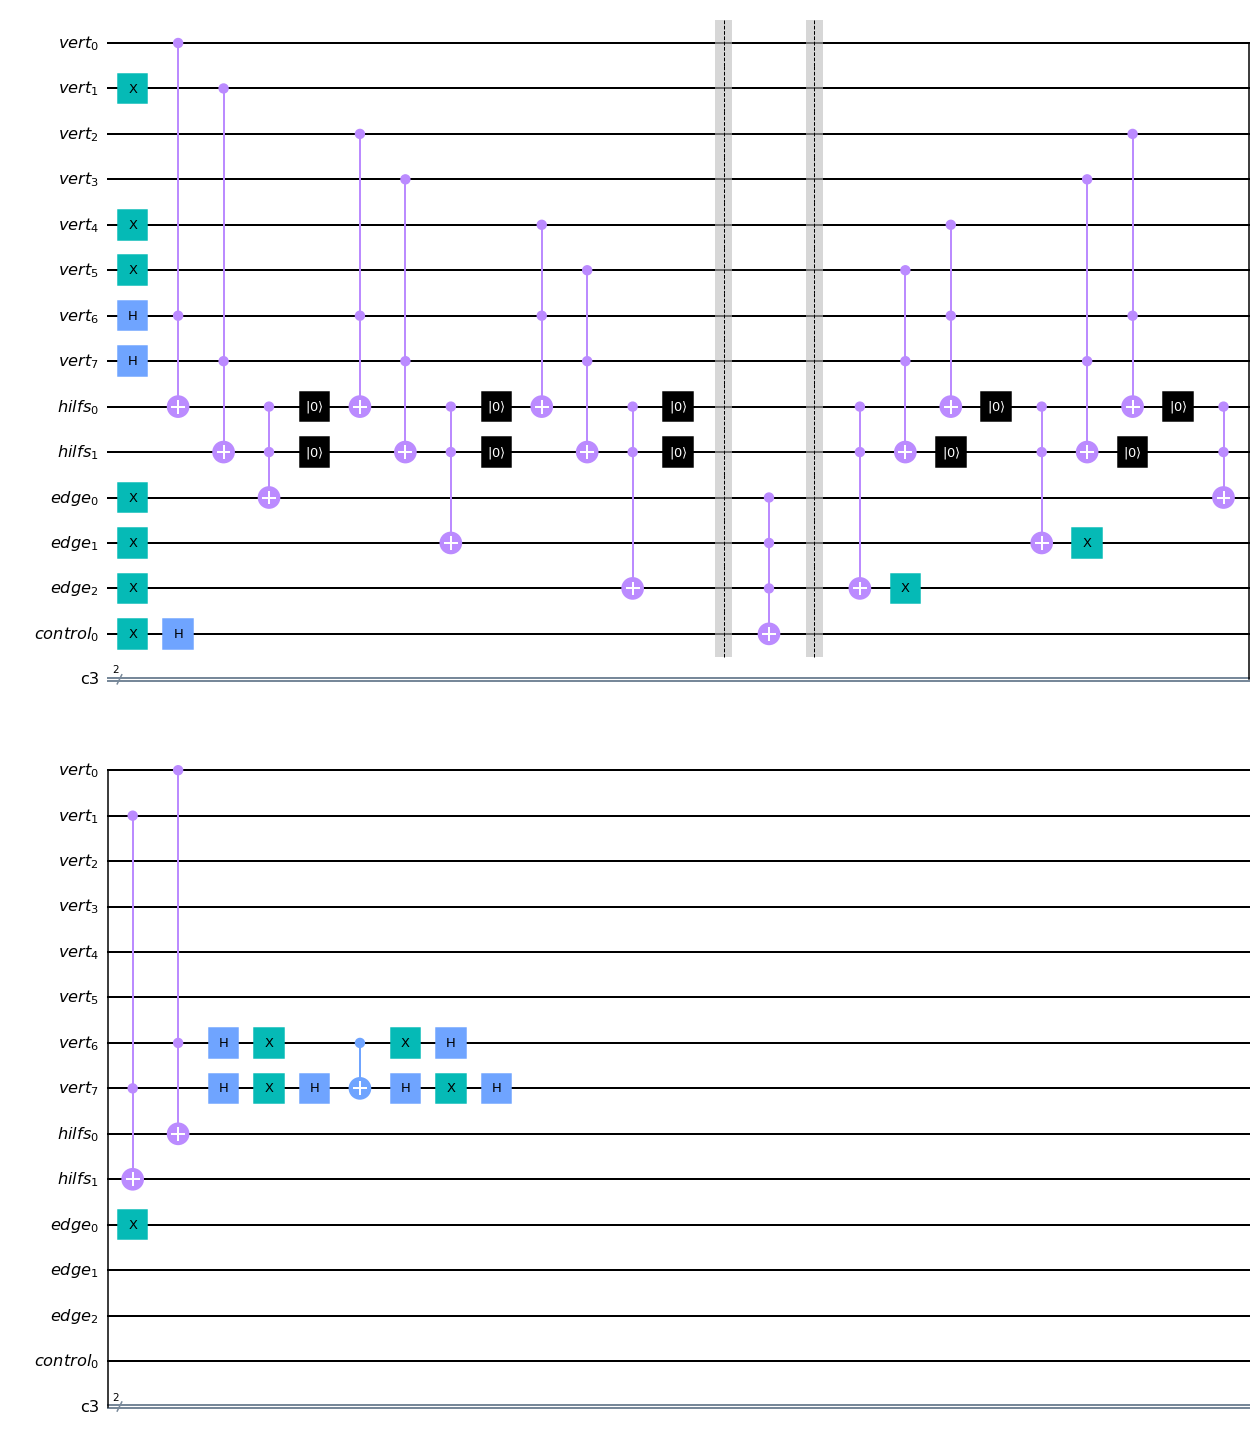

In [49]:
#diffuser
#diff_gate = diffuser(2)
#qc.append(diff_gate, vert[6:])
diffuser(qc, vert[6:])
qc.draw('mpl')

In [63]:
num = 4

vert = QuantumRegister(8, name ='vert')
hilfs = QuantumRegister(2, name ='hilfs')
edg = QuantumRegister(3, name ='edge')
contr = QuantumRegister(1, name ='control')
cr = ClassicalRegister(2)

qc = QuantumCircuit(vert, hilfs, edg, contr, cr)
qc.draw('mpl')
#color coding: 00-> Y, 01-> B, 10-> G, 11-> R
#F = {(0, B),(1, Y ),(2, R)}

qc.x(vert[1])
qc.x(vert[4])
qc.x(vert[5])
qc.h(vert[6])
qc.h(vert[7])

qc.draw('mpl')
#set control qubit in state |->
qc.x(contr)
qc.h(contr)

for i in range(num):
    qc = right(qc)
    qc = reverce(qc)
    diffuser(qc, vert[6:])
qc.measure(vert[6:],cr)    

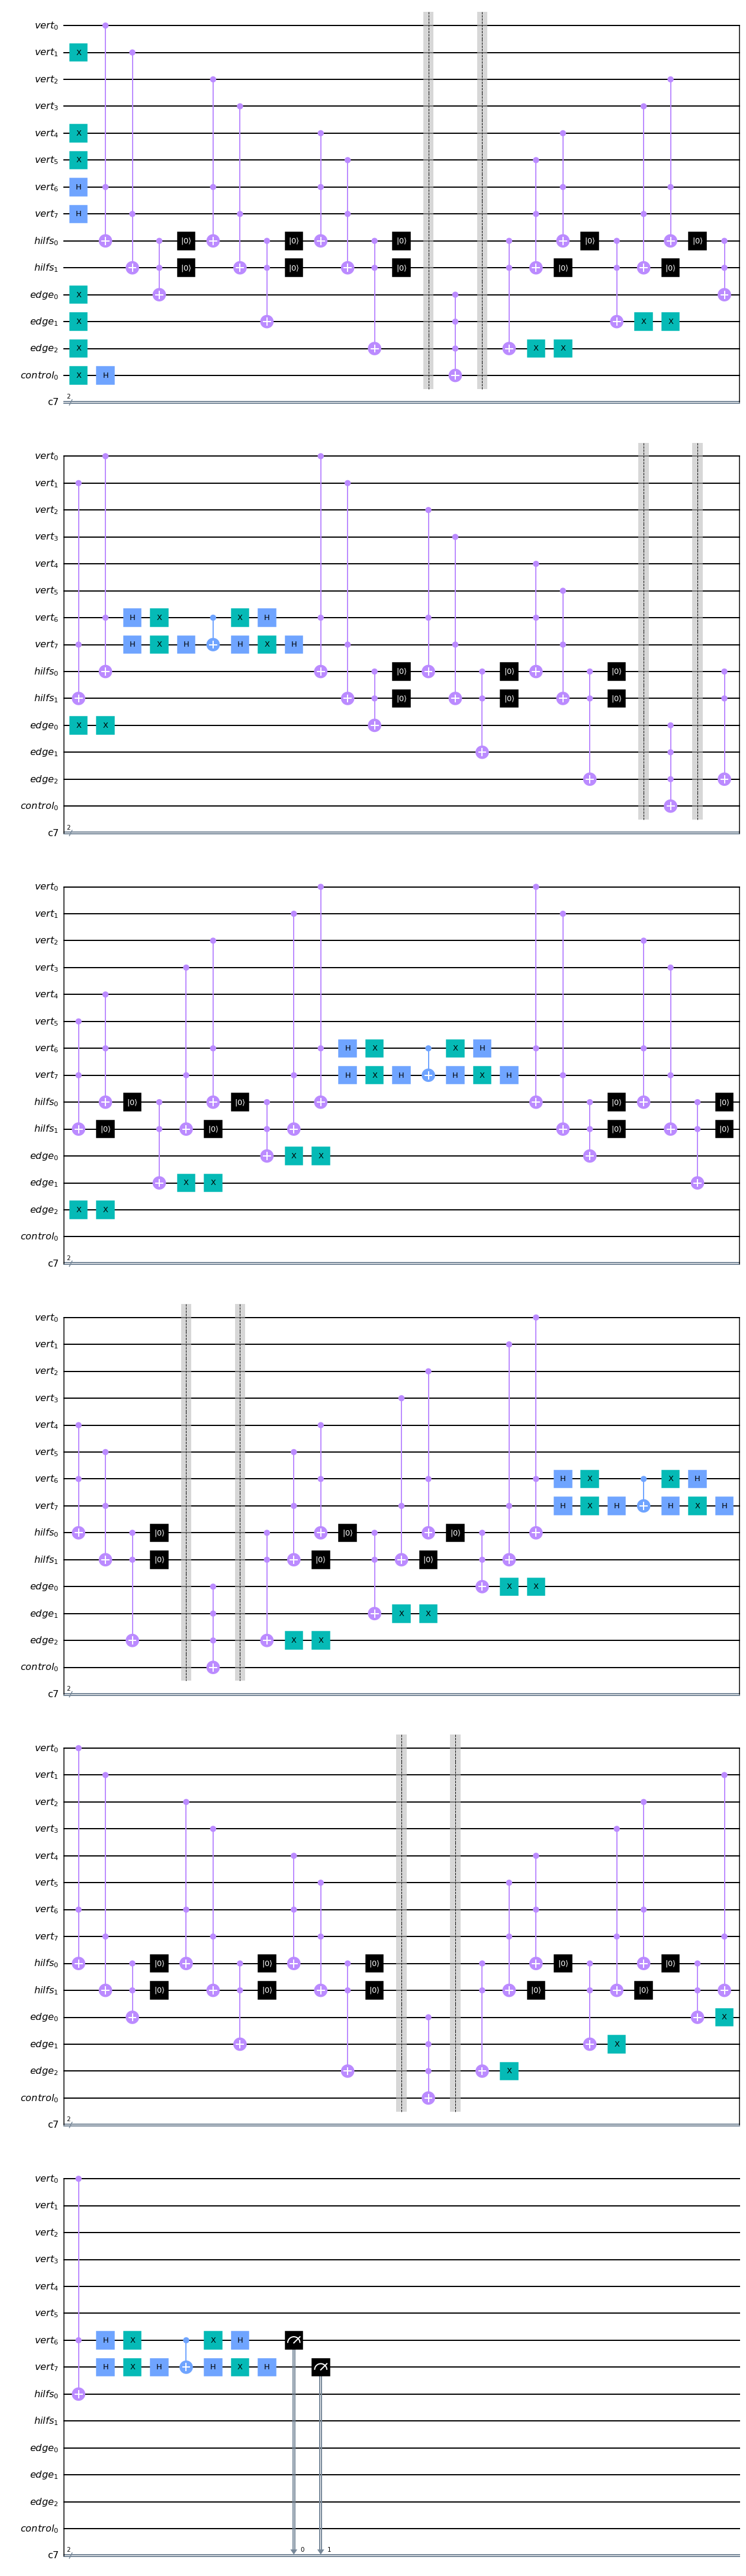

In [64]:
qc.draw('mpl')

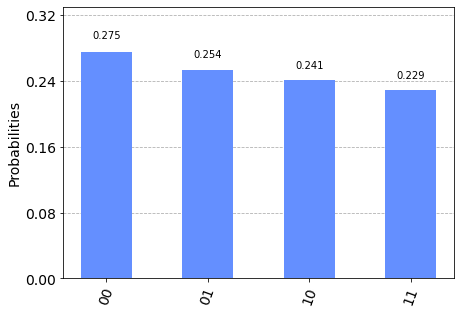

In [62]:
#run on simulator
backend = Aer.get_backend('qasm_simulator') 
result = execute(qc, backend).result()

plot_histogram(result.get_counts())

### Wie verändert sich der Lösungsweg, wenn Sie die Farbe von Knoten 1 noch nicht kennen?

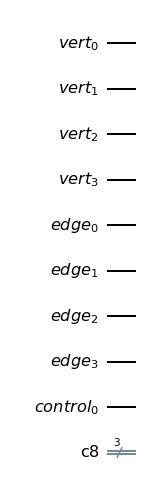

In [43]:
vert = QuantumRegister(4, name ='vert')
edg = QuantumRegister(4, name ='edge')
contr = QuantumRegister(1, name ='control')
cr = ClassicalRegister(3)

qc = QuantumCircuit(vert, edg, contr, cr)
qc.draw('mpl')

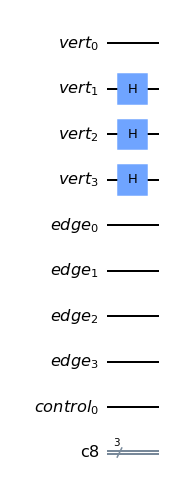

In [44]:
#color coding: 0-> blue, 1-> yellow
#vertices 0 (blue) 
#the rest are unknown: apply H
qc.h(vert[1])
qc.h(vert[2])
qc.h(vert[3])
qc.draw('mpl')

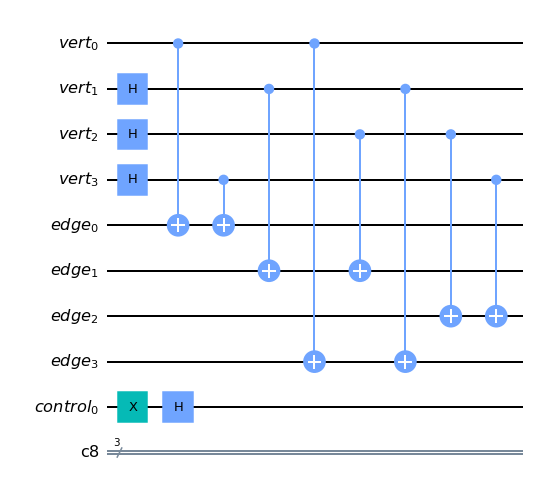

In [45]:
#set control qubit in state |->
qc.x(contr)
qc.h(contr)

#apply U_f
#encode edges
#0-3
qc.cx(vert[0],edg[0])
qc.cx(vert[3],edg[0])
#1-2
qc.cx(vert[1],edg[1])
qc.cx(vert[2],edg[1])
#2-3
qc.cx(vert[2],edg[2])
qc.cx(vert[3],edg[2])
#0-1
qc.cx(vert[0],edg[3])
qc.cx(vert[1],edg[3])
qc.draw('mpl')

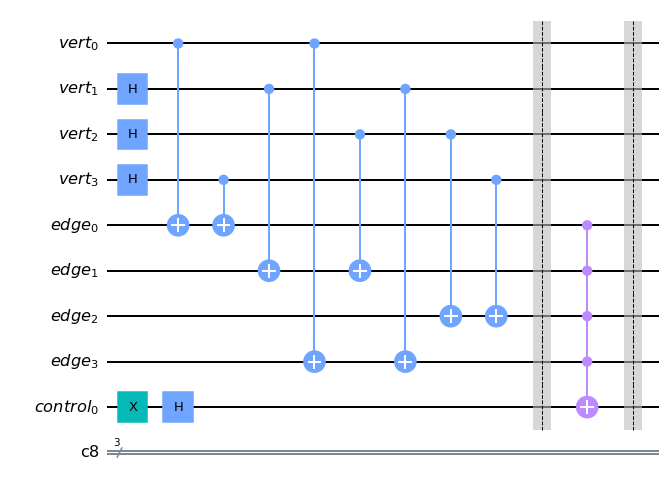

In [46]:
#add negative amplitude to the state with all ones (all edges connecting nodes with different colours)
qc.barrier()
qc.mcx(edg,contr)
qc.barrier()
qc.draw('mpl')

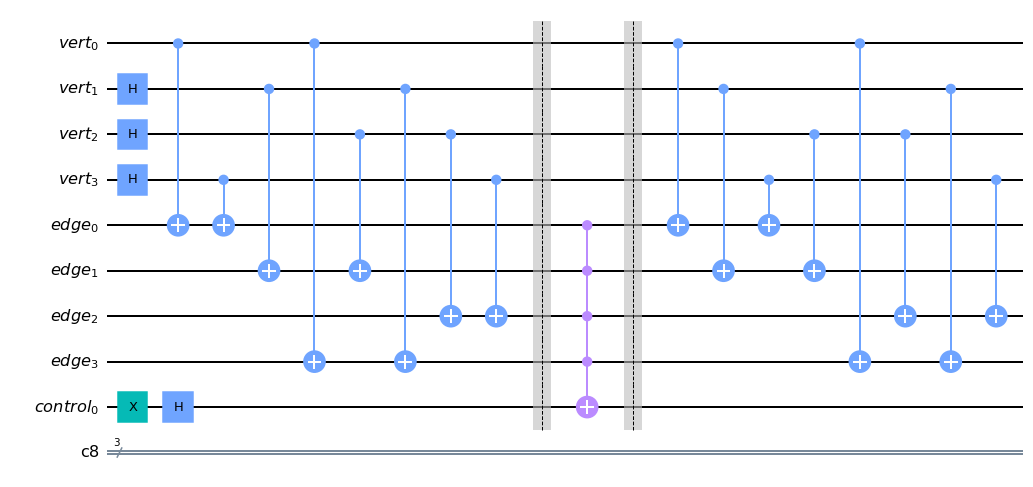

In [47]:
#reverse ding für edges

#apply U_f
#encode edges
#0-3
qc.cx(vert[0],edg[0])
qc.cx(vert[3],edg[0])
#1-2
qc.cx(vert[1],edg[1])
qc.cx(vert[2],edg[1])
#2-3
qc.cx(vert[2],edg[2])
qc.cx(vert[3],edg[2])
#0-1
qc.cx(vert[0],edg[3])
qc.cx(vert[1],edg[3])
qc.draw('mpl')

In [48]:
#diffuser
diffuser(qc,vert[1:])
qc.measure(vert[2:],cr)
qc.draw('mpl')

CircuitError: 'register size error'